### Questions Answered through this Analysis¶
#### 1. Are there any null values or outliers? How will you handle them?
#### 2. What factors are significantly related to the number of web purchases?
#### 3. Which marketing campaign was the most successful?
#### 4. What does the average customer look like?
#### 5. Which products are performing best?
#### 6. Which channels are underperforming?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-dataset/marketing_data.csv
/kaggle/input/marketing-dataset/marketing_data_dictionary.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
## reading the dataset , which is actually consist of 28 columns
read_df = pd.read_csv('/kaggle/input/marketing-dataset/marketing_data.csv')
read_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [4]:
## loading the data dict
dict_file = pd.read_csv('/kaggle/input/marketing-dataset/marketing_data_dictionary.csv')
dict_file

,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,MntWines,Amount spent on wine in the last 2 years


In [5]:
## here we are reading the title header of the data set
read_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
## actually there contains the white space between the column header ' Income '.For not facing any issue further we are renaming it with rename function
read_df.rename(columns = {' Income ': 'Income'}, inplace = True)
read_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
#view the statistics for each of the numeric columns
read_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# as we can see the year_birth mean and standard deviation is in the float which is not possible, so we need to check the data type of the column
read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# 1. Are there any null values or outliers? How will you handle them?****

### searching for the null values

In [9]:
read_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

##### There are 24 null values in the income column. Since that is less than 1% of the data we can drop them.

### Handling Outliers

 An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


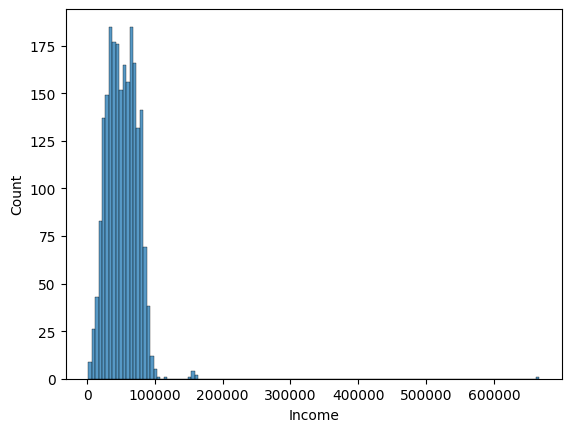

In [10]:
sns.histplot(data = read_df, x = 'Income')
plt.show()
#histogram are particularly useful for exploring continuous data, such as numerical measurements or sensor readings.

#### From the above histrogram, we can see that the income ranges between 0 to 200000. However there seems to be an outlier which may be due to any entry error. Let's remove that data value for our analysis.

In [11]:
# lets sort the data to see the outlier
read_df.sort_values(
     by="Income",
     ascending=False )

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,Saudi Arabia
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,Spain
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,1,0,0,0,0,0,0,0,0,USA
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,1,0,0,0,0,0,0,0,Spain
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,8,1,0,0,0,0,0,0,0,Germany
1983,2902,1958,Graduation,Together,NaN,1,1,2012-09-03,87,19,...,3,5,0,0,0,0,0,0,0,Australia
2139,3117,1955,Graduation,Single,NaN,0,1,2013-10-18,95,264,...,5,7,0,0,0,0,0,0,0,Australia
2165,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,4,6,0,0,0,0,0,0,0,Australia


#### we sorted the data in decending order and there is huge difference highest income that is 6,66,666 and second highest income 1,62,397. From this we calculate the outlier

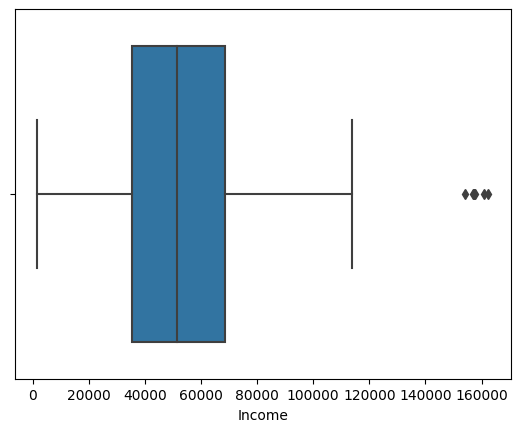

In [12]:
# Let's consider values more than 2,00,000 as outlier and remove those values
read_df = read_df[read_df['Income'] <= 200000]
# Now view the distribution of income using box plot
sns.boxplot(data = read_df, x = 'Income')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


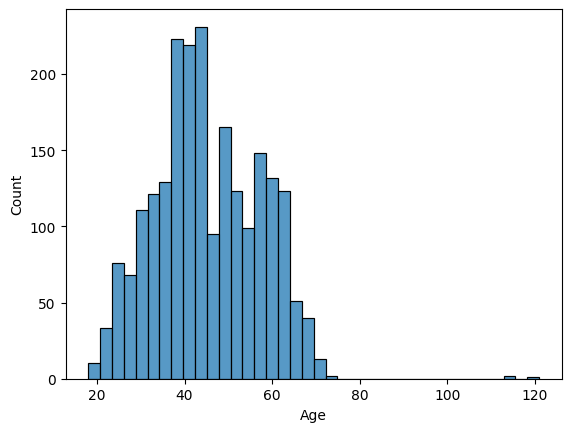

In [13]:
#create age column using 2014 year as that is the most recent enrollment date
read_df['Age'] = 2014 - read_df['Year_Birth']
# Let's check the age distribution using histogram plot
sns.histplot(data = read_df, x = 'Age')
plt.show()

From the above histogram we can observe that there are no outliers in the age column.

##### Add Columns Income Level and Age Group

In [14]:
#create a new column Income_Level using Income column
def income_group(income):
    if income < 30000:
        return 'Low Income'
    elif income >= 30000 and income < 70000:
        return 'Middle Income'
    else:
        return 'High Income'

read_df['Income_Level'] = read_df['Income'].apply(income_group)
read_df['Income_Level']

0         High Income
1       Middle Income
2       Middle Income
3       Middle Income
4          Low Income
            ...      
2235    Middle Income
2236    Middle Income
2237    Middle Income
2238    Middle Income
2239      High Income
Name: Income_Level, Length: 2215, dtype: object

In [15]:
# Create a new column age group
def age_group(age):
    if age < 30:
        return 'Young'
    elif age >= 30 and age < 60:
        return 'Middle'
    else:
        return 'Old'
    
read_df['Age_Group'] = read_df['Age'].apply(age_group)
read_df['Age_Group']

0       Middle
1       Middle
2       Middle
3       Middle
4        Young
         ...  
2235    Middle
2236    Middle
2237    Middle
2238    Middle
2239    Middle
Name: Age_Group, Length: 2215, dtype: object

##### so in question 1 there are 24 null values and the outlier present in the "Income" column.
##### null values are been calculated through the isnull().sum()
##### and outliers are found by sorting the values in table or ploting them through the graphs.

## 2. What factors are significantly related to the number of web purchases?

Mean Squared Error:  3.126354309021561
R-Squared:  0.570893703400592
                    feature      coef
26      Marital_Status_YOLO  0.808165
7              AcceptedCmp3  0.471539
31           Country_Mexico  0.462776
6         NumWebVisitsMonth  0.439704
10             AcceptedCmp1  0.402329
5         NumStorePurchases  0.250051
3         NumDealsPurchases  0.206681
2                  Teenhome  0.134482
27        Country_Australia  0.104419
24  Marital_Status_Together  0.103292
18            Education_PhD  0.069179
9              AcceptedCmp5  0.060533
14       Education_2n Cycle  0.036902
4       NumCatalogPurchases  0.033410
16     Education_Graduation  0.027220
21  Marital_Status_Divorced  0.012871
22   Marital_Status_Married  0.010996
23    Marital_Status_Single  0.008155
25     Marital_Status_Widow  0.007249
13                      Age  0.006101
28           Country_Canada  0.003398
0                    Income  0.000050
30            Country_India -0.000497
32     Country_Saud

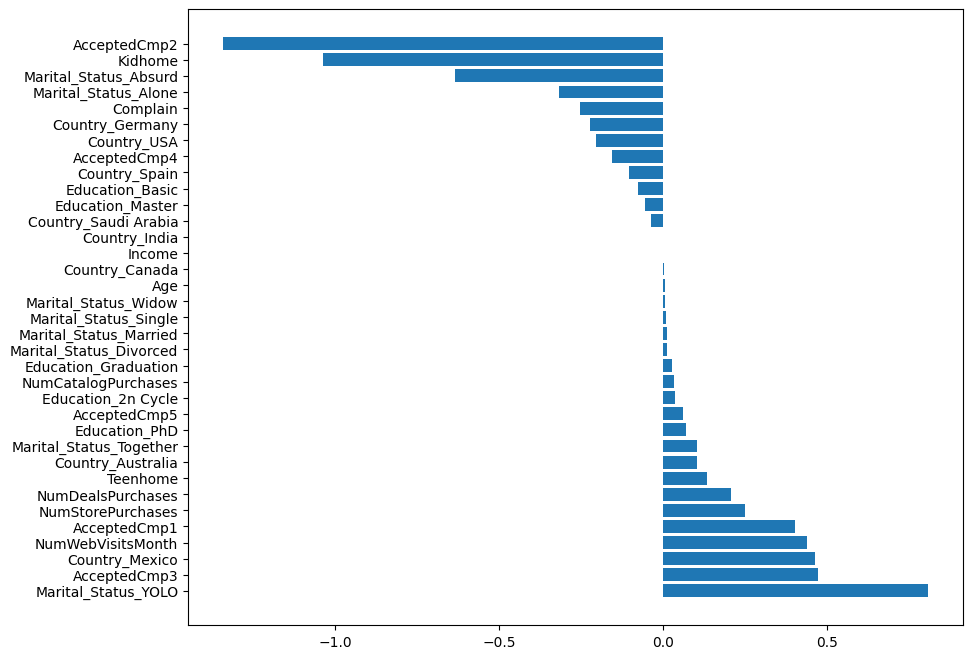

In [16]:
# Let's use regression model to identify factors significantly related to web purchases
#convert categorical data to numerical data using encoding
cat_var = pd.get_dummies(read_df, columns = ['Education', 'Marital_Status', 'Country'])

# drop the irrelevant columns for this regression model X is the independent variable
X = cat_var.drop(['ID', 'Year_Birth', 'Dt_Customer','Response', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'Income_Level', 'Age_Group'], axis = 1)

Y = read_df['NumWebPurchases'] # Y is the dependented variable for this analysis
# Split the data using train_test_split method
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

#create a model
model = LinearRegression()

#fit model
model.fit(X_train, Y_train)

#make prediction
y_pred = model.predict(X_test)

#evaluate performance
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print('Mean Squared Error: ', mse)
print('R-Squared: ', r2)


#view co-efficients
co_eff = pd.DataFrame({'feature': X.columns, 'coef': model.coef_}).sort_values('coef', ascending = False)
print(co_eff)

#plot co-efficients
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(co_eff['feature'], co_eff['coef'])
plt.show()

#### From the above graph, we can observe the following factors that are impacting the web purchases:

##### Customers who live alone tend to have high web purchases.
##### Customers from Mexico contribute to high web purchases.
##### Customers who have more kids at home buy less from web purchases.
##### Customers whose marital status is absurd also tend to spend less on web purchases.
##### Income and Age factors have no significant effect on the web purchases.

## 3. Which marketing campaign was the most successful?

AcceptedCmp2     30
AcceptedCmp1    142
AcceptedCmp5    162
AcceptedCmp3    163
AcceptedCmp4    164
Response        333
dtype: int64


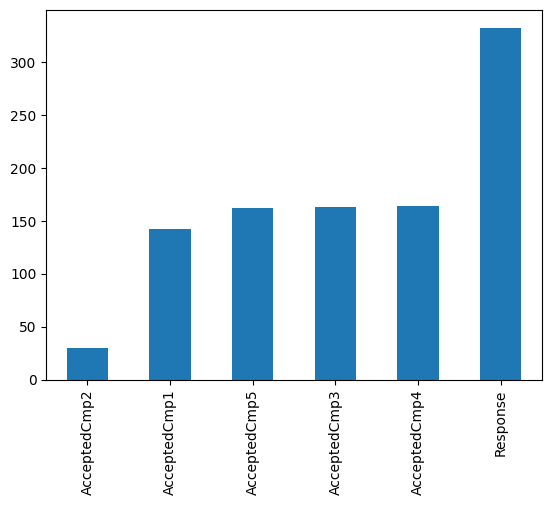

In [17]:
# Let's create a df with the columns of marketing campaign data
campaign_df = read_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

#sum up the values in each of the df and sort it 
successful_campaign = campaign_df.sum().sort_values()
print(successful_campaign)

#plot the successful campaign 
successful_campaign.plot(kind = 'bar')
plt.show()

#### so the response is the most successful campaign and accptedcmp2 is least successful

## 4. What does the average customer look like?

In [18]:
# Calculate the average of  customers income, age, education, marital status and family size
avg_age = read_df['Age'].mean()
avg_income = read_df['Income'].mean()
avg_education = read_df['Education'].mode() #we use mode function to find the most frequent education in customers
avg_marital_status = read_df['Marital_Status'].mode()
avg_family_size = read_df['Teenhome'].mean() + read_df['Kidhome'].mean()

print('The average age of customers is ', round(avg_age,0))
print('The average income of customers is ', round(avg_income,2))
print('The average family size of customers is ', round(avg_family_size,0))
print('The average education of level of customers is ', avg_education)
print('The marital status of an average customer customers is ', avg_marital_status)

The average age of customers is  45.0
The average income of customers is  51969.86
The average family size of customers is  1.0
The average education of level of customers is  0    Graduation
Name: Education, dtype: object
The marital status of an average customer customers is  0    Married
Name: Marital_Status, dtype: object


#### The average customer is a 45 year old married graduate with 1 kid and yearly income of 51,969.86

## 5. Which products are performing best?

MntFruits            58391
MntSweetProducts     59895
MntFishProducts      83397
MntGoldProds         97415
MntMeatProducts     370045
MntWines            676074
dtype: int64


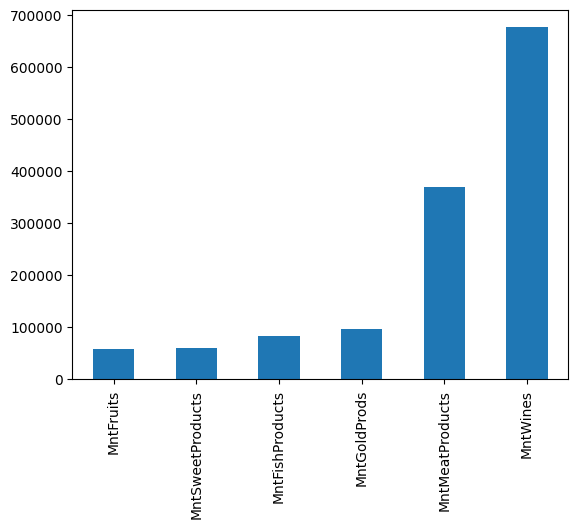

In [19]:
# Let's create a df with the columns of products data
products_df = read_df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                       'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

#sum up the values in each of the df and sort it 
best_products = products_df.sum().sort_values()
print(best_products)

#plot the best performing product 
best_products.plot(kind = 'bar')
plt.show()

#### Wine is the best performing product and meat is th next best performing product.

## 6. Which channels are underperforming?

NumDealsPurchases       5145
NumCatalogPurchases     5918
NumWebPurchases         9050
NumStorePurchases      12852
dtype: int64


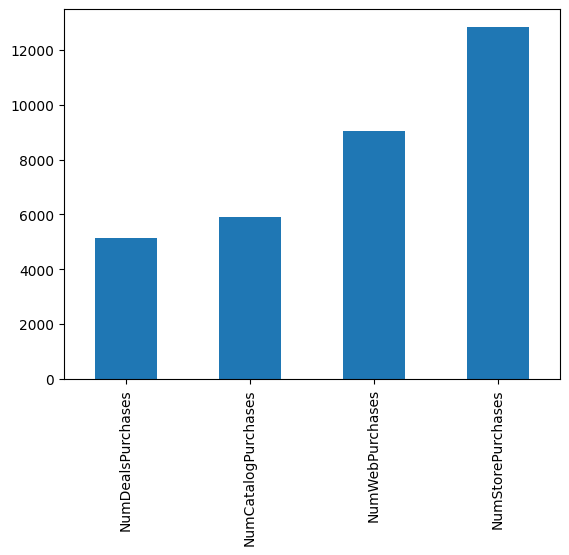

In [20]:
# Let's create a df with the columns of channels data
channels_df = read_df[['NumDealsPurchases', 'NumWebPurchases',
                       'NumCatalogPurchases', 'NumStorePurchases']]

#sum up the values in each of the df and sort it 
channel_performance = channels_df.sum().sort_values()
print(channel_performance)

#plot the underperforming channel
channel_performance.plot(kind = 'bar')
plt.show()

#### Deals channel has the lowest number of purchases with a total count of 5145.

### Conclusion:
#### * Target customers who are single and customers from Mexico as they tend to have higher web purchases.
#### * As 4th campaign is the most successful one focus on that one and make adjustments to campaign 3 and 5 to increase the effectiveness and attract more customers.
#### * Target the customers who have average age of 45, graudate and married having a single kid. The average yearly income of household is 51,969.86.
#### * As wine and meat products are the best performing products always make sure to have them in stock and offer a high quality.
#### * As deals channel is not attracting significant customers, either make changes to the strategy of deals channel or redirect the efforts to focus more on other channels that are performing well.